### Data Set Information:

The NASA data set comprises different size NACA 0012 airfoils at various wind tunnel speeds and angles of attack. The span of the airfoil and the observer position were the same in all of the experiments.


#### Attribute Information:

This problem has the following inputs: 
1. Frequency, in Hertzs. 
2. Angle of attack, in degrees. 
3. Chord length, in meters. 
4. Free-stream velocity, in meters per second. 
5. Suction side displacement thickness, in meters. 

The only output is: 
6. Scaled sound pressure level, in decibels. 

In [54]:
import numpy as np
import pandas as pd

import scipy.stats as stats
from pandas.plotting import scatter_matrix

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [55]:
#Load Data - We will start with loading the data into a variable, which we will use for further analysis

def load_data(path,columns):
    df=pd.read_table(path,sep='\t',names=columns)
    return df

In [56]:
def intial_analysis(dataframe):
       
    print('\033[1m' + "\nDisplay the shape (columns and rows) of the dataset:" +'\033[0m' )
    print("\tcolumns : {}\n\trows : {}".format(dataframe.shape[0],dataframe.shape[1]))
    
    print('\033[1m' + "\nInformation about the dataset:" +'\033[0m')
    dataframe.info()
    
    print('\033[1m' + "\nDetails on Numerical and Categorical features within dataset:\n" + '\033[0m')
    #list the number of Numerical Features in our dataset.
    numerical_feature_columns = list(df._get_numeric_data().columns)
    print("Numeric Columns:",numerical_feature_columns)
    
    #let's find out the number of Categorical Features in our dataset.
    categorical_feature_columns = list(set(df.columns) - set(df._get_numeric_data().columns))
    print("Categorical Columns:",categorical_feature_columns)
    

    print('\033[1m' + "\nPrint any null values within dataset:\n" + '\033[0m')
                
    labels = []
    values = []
    for col in dataframe.columns:
        labels.append(col)
        values.append(dataframe[col].isnull().sum())
        if values[-1]!=0:
            print(col, values[-1])

In [57]:
def c_value_counts(categorical_feature_columns):
    for var in categorical_feature_columns:
        print("<================ %s ================>" % var)
        print(pd.DataFrame({"Freq": df[var].value_counts(), 
                            "Freq_Perc": 100*df[var].value_counts()/sum(df[var].value_counts())}))
        print("\n")

In [58]:
path = r"C:\Users\divyakamat\python_git_repositories\linear_regression\AirFoil Self Noise\dataset\airfoil_self_noise.dat"

columns = ['Frequency','Attack_Angle','Chord_Length','Velocity','Thickness','Pressure_Level']
df = load_data(path,columns)

In [59]:
df.head()

,Frequency,Attack_Angle,Chord_Length,Velocity,Thickness,Pressure_Level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [60]:
intial_analysis(df)


Display the shape (columns and rows) of the dataset:
	columns : 1503
	rows : 6

Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
Frequency         1503 non-null int64
Attack_Angle      1503 non-null float64
Chord_Length      1503 non-null float64
Velocity          1503 non-null float64
Thickness         1503 non-null float64
Pressure_Level    1503 non-null float64
dtypes: float64(5), int64(1)
memory usage: 70.5 KB

Details on Numerical and Categorical features within dataset:

Numeric Columns: ['Frequency', 'Attack_Angle', 'Chord_Length', 'Velocity', 'Thickness', 'Pressure_Level']
Categorical Columns: []

Print any null values within dataset:



In [61]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Frequency,1503.0,2886.380572,3152.573137,200.000000,800.000000,1600.000000,4000.000000,20000.000000
Attack_Angle,1503.0,6.782302,5.918128,0.000000,2.000000,5.400000,9.900000,22.200000
Chord_Length,1503.0,0.136548,0.093541,0.025400,0.050800,0.101600,0.228600,0.304800
Velocity,1503.0,50.860745,15.572784,31.700000,39.600000,39.600000,71.300000,71.300000
Thickness,1503.0,0.011140,0.013150,0.000401,0.002535,0.004957,0.015576,0.058411
Pressure_Level,1503.0,124.835943,6.898657,103.380000,120.191000,125.721000,129.995500,140.987000


C:\Users\divyakamat\Anaconda2\envs\py36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


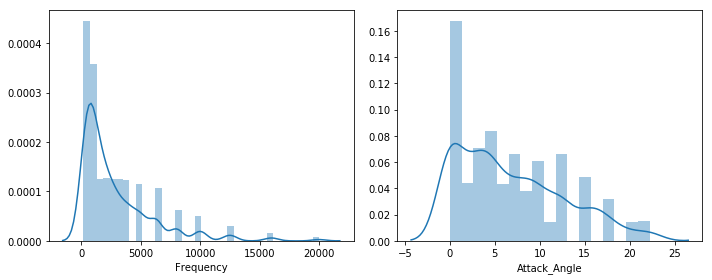

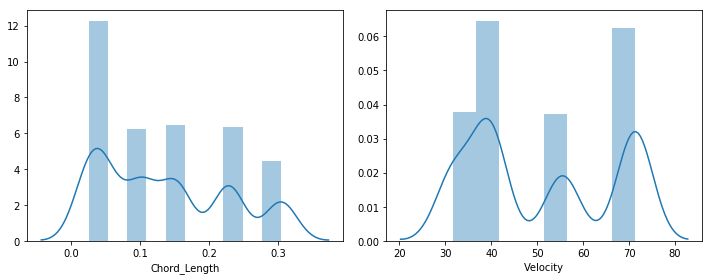

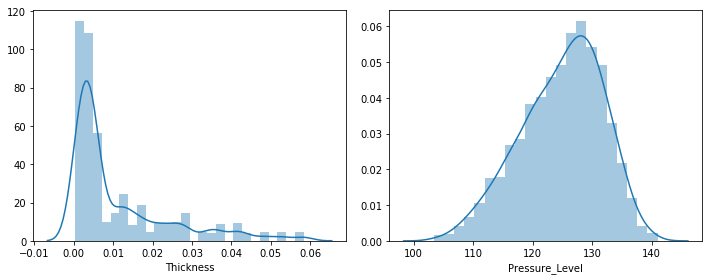

In [62]:
num_cols = list(df._get_numeric_data().columns)
for i in range(0,len(num_cols),2):
    if len(num_cols) > i+1:
        plt.figure(figsize=(10,4))
        plt.subplot(121)
        sns.distplot(df[num_cols[i]], hist=True, kde=True)
        plt.subplot(122)            
        sns.distplot(df[num_cols[i+1]], hist=True, kde=True)
        plt.tight_layout()
        plt.show()

    else:
        sns.distplot(df[num_cols[i]], hist=True, kde=True)

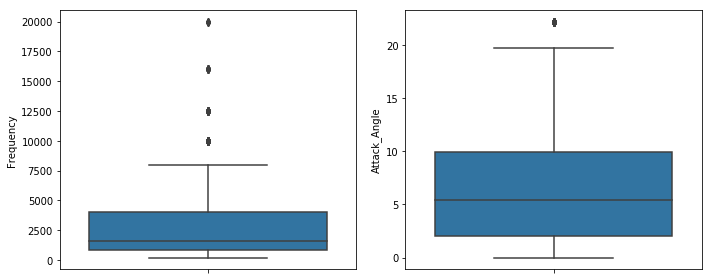

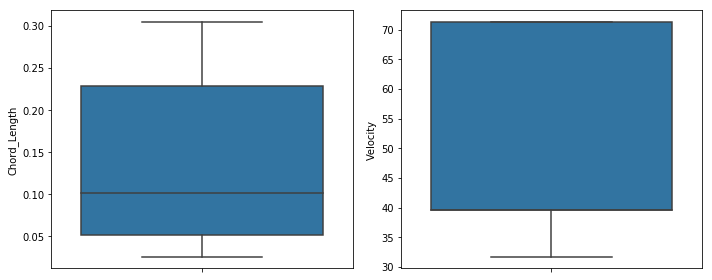

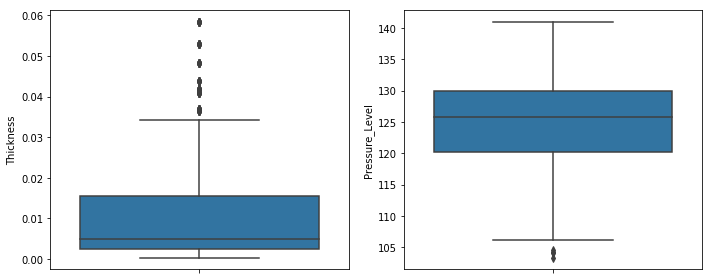

In [63]:
for i in range(0,len(num_cols),2):
    if len(num_cols) > i+1:
        plt.figure(figsize=(10,4))
        plt.subplot(121)
        sns.boxplot(x=df[num_cols[i]],orient='v')
        plt.subplot(122)            
        sns.boxplot(x=df[num_cols[i+1]],orient='v')
        plt.tight_layout()
        plt.show()

    else:
        sns.boxplot(x=df[num_cols[i]],orient='v')

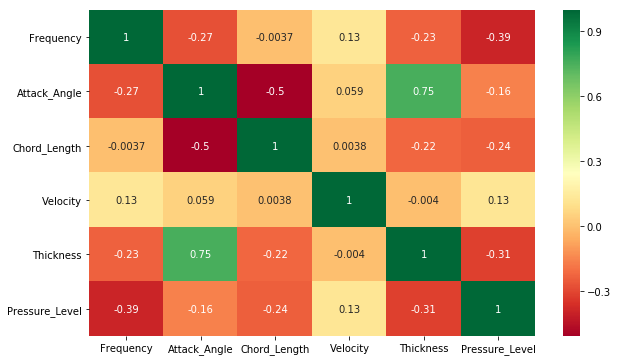

In [64]:
X = df.iloc[:,:-1]  #independent columns
y = df.iloc[:,-1]    #target column i.e price range
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,6))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [65]:
from sklearn.model_selection import train_test_split

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function
# Split X and y into training and test set in 80:20 ratio

def split_dataset(df):
    X=df.iloc[:,:-1]
    y=df.iloc[:,-1]
    
    X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1,test_size=0.30)
    return X_train,X_test,y_train,y_test

In [66]:
from sklearn.linear_model import LinearRegression
def linear_regression(X_train,y_train):
    regressor = LinearRegression()
    regressor.fit(X_train,y_train)
    return regressor

In [67]:
def plot_residuals(y_test,y_pred,name="Residual Plot"):
    residuals = y_test - y_pred
    plt.scatter(y_test,residuals)
    plt.title(name)

In [68]:
from sklearn.preprocessing import StandardScaler

def scale_data(X):
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    return X

In [69]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def regression_predictor(model,x_test,y_test):
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test,y_pred)
    mae = mean_absolute_error(y_test,y_pred)
    r2 = r2_score(y_test,y_pred)
    rmse = np.sqrt(mse)
    adj_r_squared = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)- x_test.shape[1]- 1)
    stats = pd.DataFrame({'cross_validation':val,'rmse':rmse,'mse':mse,'mae':mae,'r2':r2,'adj_r_squared':adj_r_squared},index=['name'])
    return model,y_pred,stats

In [70]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
def cross_validation_regressor(model,x_train,y_train):
    kf = KFold(n_splits=10, random_state=7)
    score = cross_val_score(model,x_train,y_train,cv=kf)
    return score.mean()

In [71]:
from sklearn.linear_model import Lasso
def lasso(x_train,x_test,y_train,y_test,alpha):
    lass = Lasso(alpha=alpha,random_state=7)
    model = lass.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test,y_pred)
    mae = mean_absolute_error(y_test,y_pred)
    r2=model.score(x_test,y_test)
    rmse = np.sqrt(mse)
    val = cross_validation_regressor(lass,x_train,y_train)
    adj_r_squared = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)- x_test.shape[1]- 1)
    stats = pd.DataFrame({'cross_validation':val,
                         'rmse':rmse,'mse':mse,'mae':mae,'r2':(model.score(x_test,y_test)),'adj_r_squared':adj_r_squared},index=['name'])
    return model,y_pred,stats

In [72]:
from sklearn.linear_model import Ridge

def ridge(x_train,x_test,y_train,y_test,alpha):
    rid = Ridge(alpha=alpha,random_state=7,normalize=True)
    model = rid.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test,y_pred)
    mae = mean_absolute_error(y_test,y_pred)
    r2=model.score(x_test,y_test)
    rmse = np.sqrt(mse)
    val = cross_validation_regressor(rid,x_train,y_train)
    adj_r_squared = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)- x_test.shape[1]- 1)
    stats = pd.DataFrame({'cross_validation':val,
                         'rmse':rmse,'mse':mse,'mae':mae,'r2':model.score(x_test,y_test),'adj_r_squared':adj_r_squared},index=['name'])
    return model,y_pred,stats

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
      adj_r_squared  cross_validation       mae        mse        r2      rmse
name       0.462896          0.510076  3.882017  24.782847  0.468864  4.978237


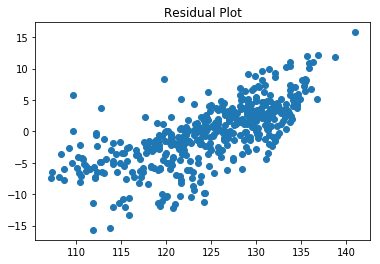

In [73]:
plt.switch_backend('agg')

X_train, X_test, y_train, y_test =  split_dataset(df)

model = linear_regression(X_train,y_train)
val = cross_validation_regressor(model,X_train,y_train)
model,y_pred,stats = regression_predictor(model, X_test, y_test)
print(model)
print(stats)
plot_residuals(y_test,y_pred)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=7,
   selection='cyclic', tol=0.0001, warm_start=False)
      adj_r_squared  cross_validation       mae       mse        r2      rmse
name       0.419403          0.443387  4.218462  26.78968  0.425854  5.175875


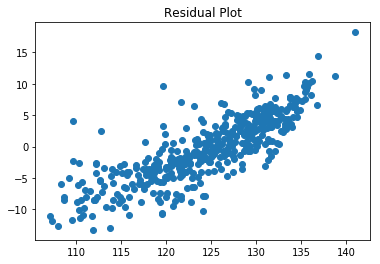

In [74]:
model,y_pred,stats = lasso(X_train,X_test,y_train,y_test,alpha=0.1)
print(model)
print(stats)
plot_residuals(y_test,y_pred)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=7, solver='auto', tol=0.001)
      adj_r_squared  cross_validation       mae        mse        r2      rmse
name       0.454059          0.501611  3.983094  25.190611  0.460125  5.019025


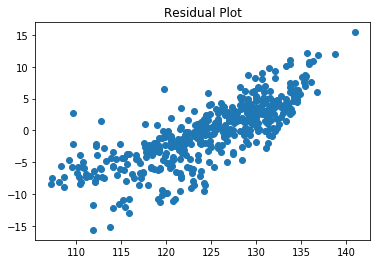

In [75]:
model,y_pred,stats = ridge(X_train,X_test,y_train,y_test,alpha=0.1)
print(model)
print(stats)
plot_residuals(y_test,y_pred)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
      adj_r_squared  cross_validation       mae       mse        r2      rmse
name       0.471229          0.516085  0.031116  0.001592  0.477104  0.039901


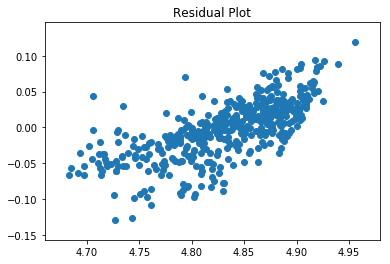

In [76]:
df["Pressure_Level"] = np.log1p(df["Pressure_Level"])


plt.switch_backend('agg')
#X = scale_data(df)

X_train, X_test, y_train, y_test =  split_dataset(df)

model = linear_regression(X_train,y_train)
val = cross_validation_regressor(model,X_train,y_train)
model,y_pred,stats = regression_predictor(model, X_test, y_test)
print(model)
print(stats)
plot_residuals(y_test,y_pred)